In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# custcat is the target value that we need to classify
# 1. Basic Service
# 2. E-Service
# 3. Plus Service
# 4. Total Service
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
# lets see the distribution of the dataset
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

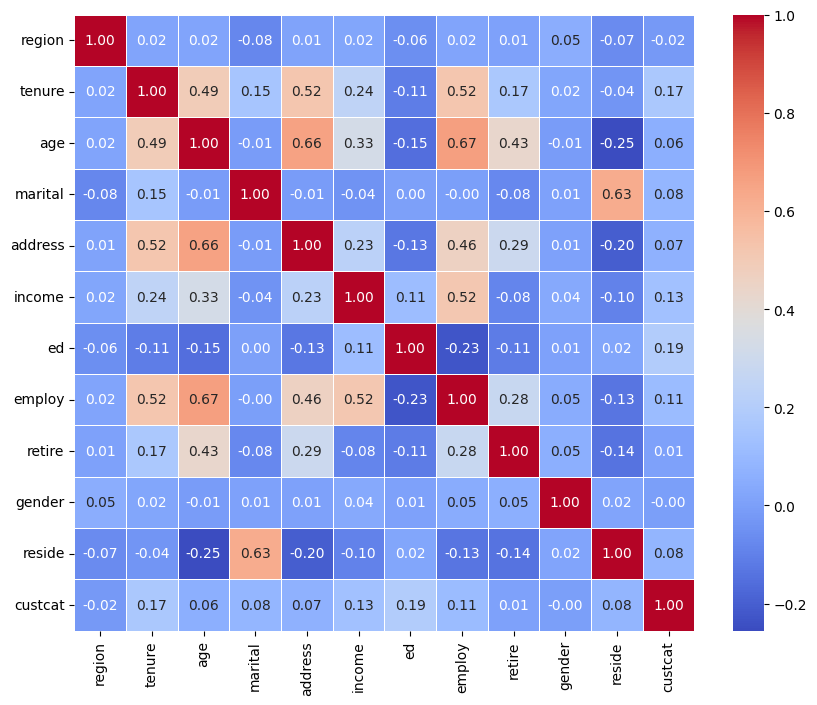

In [4]:
corr_matrix = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

In [5]:
# above figure shows the correlation coefficients from each feature to other features
corr_values = round(abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending = False), 3)
corr_values

ed         0.194
tenure     0.167
income     0.135
employ     0.110
marital    0.084
reside     0.082
address    0.068
age        0.057
region     0.024
retire     0.009
gender     0.005
Name: custcat, dtype: float64

In [6]:
# separate the input and target features
x = df.drop('custcat', axis = 1)
y = df['custcat']

In [7]:
# Normalize the data
x_norm = StandardScaler().fit_transform(x)

In [8]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 42)

In [9]:
# KNN Classification
# Training
# may start by using a small value as the value of k, say k = 3
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_model = knn_classifier.fit(x_train, y_train)
y_hat = knn_model.predict(x_test)
print("test the accuracy: ", accuracy_score(y_test, y_hat))

test the accuracy:  0.365


## Practice 1: using k = 6

In [10]:
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_model = knn_classifier.fit(x_train, y_train)
y_hat = knn_model.predict(x_test)
accuracy_score(y_test, y_hat)

0.33

## test k value ranged from 1 to 9

In [11]:
Ks = 10
acc = np.zeros((Ks))     # acc stands for accuracy; np.zeros create a numpy array that fulls of zeros and input is the shape (tuple)
std_acc = np.zeros((Ks))
for n in range(1, Ks + 1):
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    y_hat = knn_model.predict(x_test)
    acc[n-1] = accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

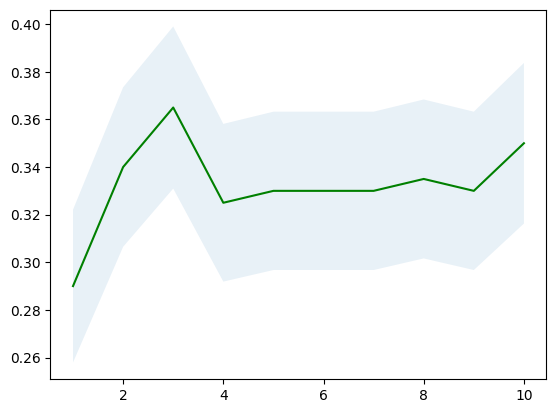

In [13]:
plt.plot(range(1, Ks + 1), acc, 'g')
plt.fill_between(range(1, Ks + 1), acc - 1 * std_acc, acc + 1 * std_acc, alpha = 0.10)
